In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Define arrays 
t = []
S = []
E = []
I = [] 
R = []
dS = [] 
dE = [] 
dI = [] 
dR = []

In [3]:
# Define initial variables 
S.append(8771761)   # No of population susceptible to Rubella
E.append(142)       # No of population with symptoms of Rubella 
I.append(37)        # No of population infected with Rubella 
R.append(30)        # No of population recovered from Rubella 

In [4]:
# Parameter values 
h = 1
N = 1
sigma = 0.309 
beta = 0.00000002 
alpha = 0.4 
gamma = 0.1667 
delta = 0.14 
mu = 0.0012 
theta = 0.0187

In [5]:
# Define system of differential equations 
# dS/dt 
def dS(R, E, S):
    return (1 - sigma)*theta*N + delta*R - beta*S*E - mu*S 
# dE/dt
def dE(S, E):
    return beta*S*E - alpha*E - mu*E
# dI/dt 
def dI(E, I):
    return alpha*E - gamma*I - mu*I 
# dR/dt 
def dR(I, R):
    return gamma*I + sigma*theta*N - delta*R - mu*R


In [6]:
for i in range(0,100):
    t.append(i)
    
    # k for dS/dt
    # l for dE/dt 
    # m for dI/dt
    # n for dR/dt 

    k1 = h * dS(R[i], E[i], S[i])
    l1 = h * dE(S[i], E[i]) 
    m1 = h * dI(E[i], I[i]) 
    n1 = h * dR(I[i], R[i]) 

    k2 = h * dS(R[i]+(h/2)*(n1), E[i]+(h/2)*(l1), S[i]+(k1/2))
    l2 = h * dE(S[i]+(h/2)*(l1), E[i]+(l1/2))
    m2 = h * dI(E[i]+(l1/2), I[i]+(m1/2))
    n2 = h * dR(I[i]+(m1/2), R[i]+(n1/2)) 

    k3 = h * dS(R[i]+(h/2)*(n2), E[i]+(h/2)*(l2), S[i]+(k2/2))
    l3 = h * dE(S[i]+(k2/2), E[i]+(l2/2)) 
    m3 = h * dI(E[i]+(l2/2), I[i]+(m2/2))
    n3 = h * dR(I[i]+(m2/2), R[i]+(n2/2)) 

    k4 = h * dS(R[i]+n3, E[i]+l3, S[i]+k3)
    l4 = h * dE(S[i]+k3, E[i]+l3)
    m4 = h * dI(E[i]+l3, I[i]+m3)
    n4 = h * dR(I[i]+m3, R[i]+n3)

    S.append(S[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4))
    E.append(E[i] + (1/6)*(l1 + 2*l2 + 2*l3 + l4))
    I.append(I[i] + (1/6)*(m1 + 2*m2 + 2*m3 + m4))
    R.append(R[i] + (1/6)*(n1 + 2*n2 + 2*n3 + n4))

In [7]:
t = list(range(0,101))
d = {'t':t, 'S(t)':S, 'E(t)':E, 'I(t)':I, 'R(t)':R}
df = pd.DataFrame(data=d)
df

,t,S(t),E(t),I(t),R(t)
0,0,8.771761e+06,1.420000e+02,37.000000,30.000000
1,1,8.761223e+06,1.132913e+02,77.934045,35.305665
2,2,8.750704e+06,9.036780e+01,103.105451,44.957170
3,3,8.740203e+06,7.206749e+01,116.852721,56.292541
4,4,8.729718e+06,5.746110e+01,122.461598,67.587533
...,...,...,...,...,...
96,96,7.817475e+06,2.160206e-08,0.000097,0.045953
97,97,7.808100e+06,1.690913e-08,0.000082,0.045304
98,98,7.798736e+06,1.323323e-08,0.000069,0.044739
99,99,7.789383e+06,1.035450e-08,0.000058,0.044246


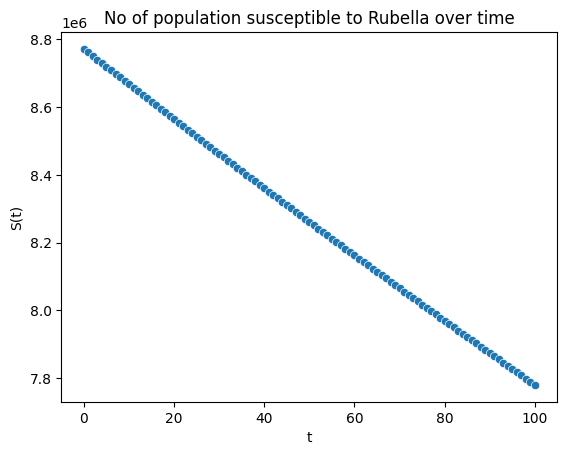

In [8]:
S_plot = sns.scatterplot(x='t', y='S(t)', data=df).set(title="No of population susceptible to Rubella over time")

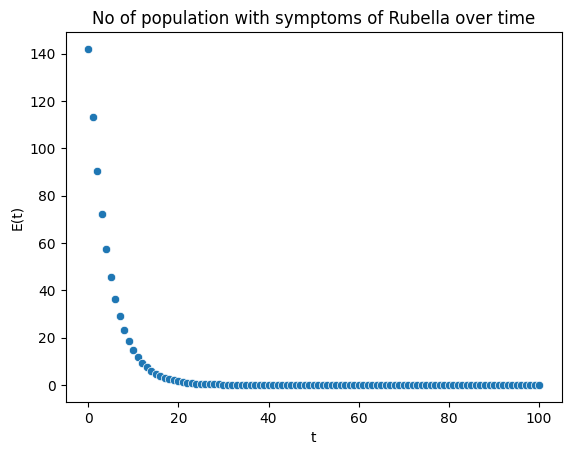

In [9]:
E_plot = sns.scatterplot(x='t', y='E(t)', data=df).set(title="No of population with symptoms of Rubella over time")

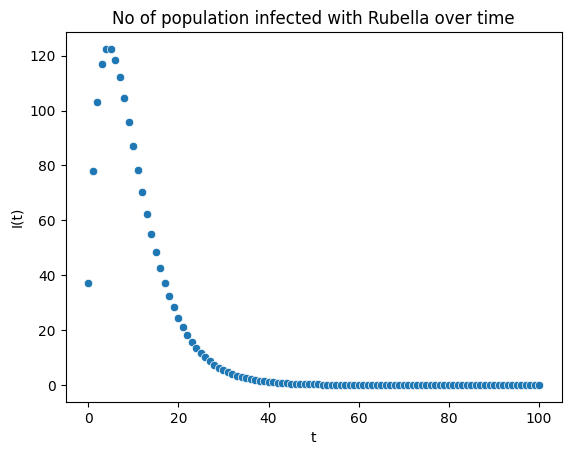

In [10]:
I_plot = sns.scatterplot(x='t', y='I(t)', data=df).set(title="No of population infected with Rubella over time")

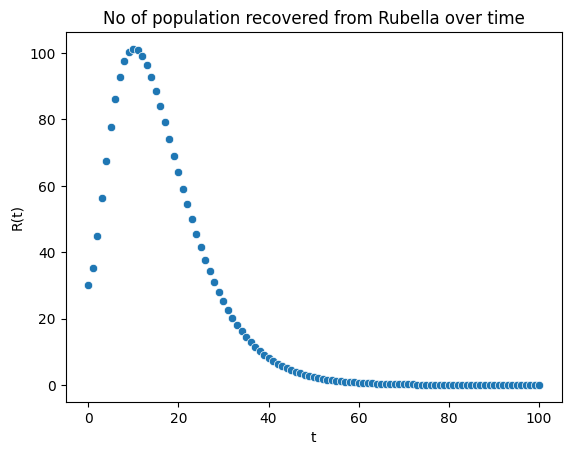

In [11]:
R_plot = sns.scatterplot(x='t', y='R(t)', data=df, ).set(title="No of population recovered from Rubella over time")


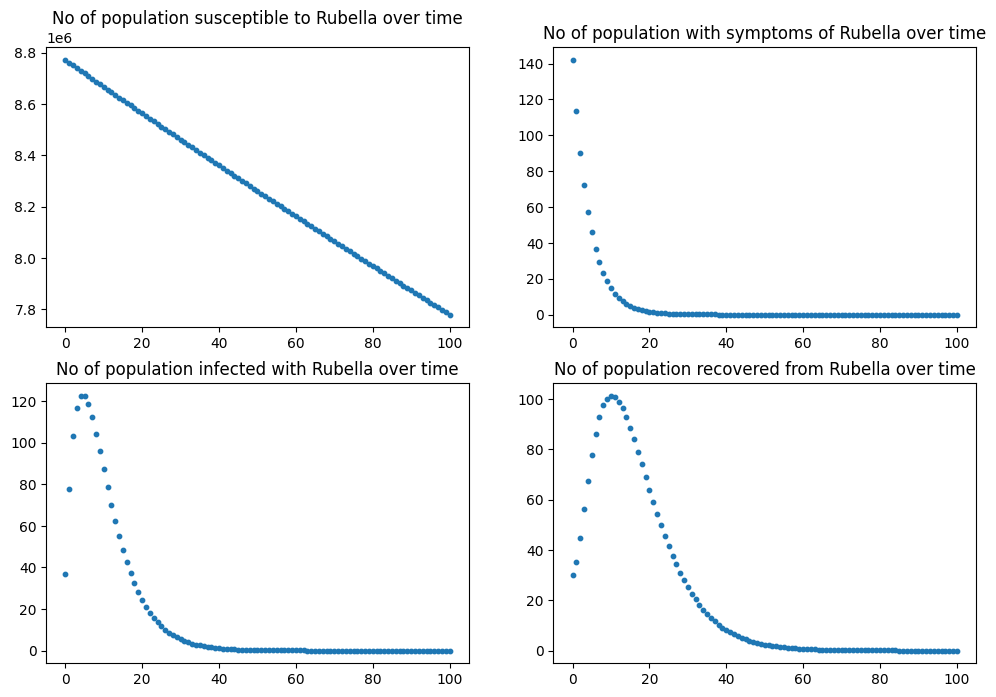

In [12]:
# Plot in same figure
figure, axis = plt.subplots(2, 2, figsize=(12, 8))
axis[0, 0].scatter(t, S, s=10)
axis[0, 0].set_title("No of population susceptible to Rubella over time")
axis[0, 1].scatter(t, E, s=10)
axis[0, 1].set_title("No of population with symptoms of Rubella over time")
axis[1, 0].scatter(t, I, s=10)
axis[1, 0].set_title("No of population infected with Rubella over time")
axis[1, 1].scatter(t, R, s=10)
axis[1, 1].set_title("No of population recovered from Rubella over time")
plt.show()

In [13]:
# Export data to csv file
df.to_csv('data.csv')